In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
import tokenize

In [2]:
# Additional Import Statements
import nltk
import tokenize
import collections

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:\\Users\\trist\\OneDrive\\Desktop\\Freelance\\School\\M1 Results"
os.chdir(data_location)

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter"
lyrics_folder = "lyrics"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :

    num_tokens= len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = len("".join(tokens))

    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


# Q: Why is it beneficial to use assertion statements in your code?

# A: The primary reseaon to use assert statements is to validate the code before running your code.


### Data Input


# Read Lyrics Data

In [6]:
def words(text): 
    return re.findall(r'\w+', text.lower())

artist_folders = os.listdir("lyrics/")
artist_folders = [f for f in artist_folders if os.path.isdir("lyrics/" + f)]

lyrics_dict = dict()
for artist in artist_folders : 
    lyrics_dict[artist] = dict()
    artist_files = os.listdir("lyrics/" + artist)
    artist_files = [f for f in artist_files if 'txt' in f or 'csv' in f or 'tsv' in f]
    artist_words = []

    file=dict()
    for f_name in artist_files : 
        with open("lyrics/" + artist + "/" + f_name) as infile : 
            song = re.split('.txt',f_name)
            contents = infile.read()
            lyrics_dict[artist][song[0]]=contents




In [7]:
print("Count Robyn " + str(len(lyrics_dict['cher'])))

Count Robyn 316


# Read Twitter Data

In [8]:
description_artist = defaultdict(list)
artist_folders = os.listdir("twitter")
handles = ['robynkonichiwa','cher']

for artist in handles:
    follower_data = artist + '_followers_data.txt'

    with open('twitter/' + follower_data,'r', encoding = 'utf8') as infile:
        headers = infile.readline().split("\t")

        for idx, line in enumerate(infile.readlines()):
            line = line.strip('\n').split('\t')
            try:
                description_artist[artist].append(line[6])
            except:
                pass

In [9]:
print("Count Robyn " + str(len(description_artist['robynkonichiwa'])))

print("Count Cher " + str(len(description_artist['cher'])))


Count Robyn 358372
Count Cher 3994803


### Data Cleaning


In [10]:
punctuation = set(punctuation) # speeds up comparison
punctuation = punctuation - {'#'}

stop_word = set(stopwords.words('english'))

In [11]:
lyrics_clean = defaultdict(list)
artist_folders = os.listdir("Lyrics")
artists = ['robyn','cher']
lyrics = dict()

for artist, value in lyrics_dict.items():
    file_punctuation = dict()
    for key2, value2 in value.items():
        new_content = ''
        for value3 in value2:
            if value3 not in punctuation:
                new_content = new_content + value3
        new_content = ' '.join([x for x in new_content.lower().split() if x not in stop_word])
        file_punctuation[key2] = new_content
        
    lyrics_clean[artist]=file_punctuation

In [12]:
clean_description_artist = {}
artist_folders = os.listdir("Twitter")
handles = ['robynkonichiwa','cher']

for artist in handles:
    clean_description_artist[artist]=""
    follower_data = artist + '_followers_data.txt'
    with open('twitter/' + follower_data,'r', encoding = 'utf8') as infile:
        headers = infile.readline().split("\t")
        for idx, line in enumerate(infile.readlines()):

            orig_desc = line.split("\t")[6]
            
            orig_desc = orig_desc.replace('\n',"")
            orig_desc = orig_desc.replace('\t',"")
            
            for sw in stop_word:
                orig_desc.replace(sw,"")

            orig_desc=orig_desc.lower()
            
            for p in punctuation:
                orig_desc.replace(p,"")
                
            clean_description_artist[artist]+=orig_desc

print(clean_description_artist)

KeyboardInterrupt: 

In [13]:
print("Count Robyn " + str(len(clean_description_artist['robynkonichiwa'])))

print("Count Cher " + str(len(clean_description_artist['cher'])))

Count Robyn 12943754
Count Cher 15154579


In [14]:
# 4 calls - 2 for each artist (1 for lyrics / 1 for twitter)
text = lyrics_clean['cher']
full_lyrics_text_cher = " ".join(lyrics_clean['cher'].values()).split()
descriptive_stats(full_lyrics_text_cher, verbose=True)

text = lyrics_clean['robyn']
full_lyrics_text_robyn = " ".join(lyrics_clean['robyn'].values()).split()
descriptive_stats(full_lyrics_text_robyn, verbose=True)

text = clean_description_artist['cher']
full_description_text_cher = clean_description_artist['cher'].split()
descriptive_stats(full_description_text_cher, verbose=True)

text = clean_description_artist['robynkonichiwa']
full_description_text_robyn = clean_description_artist['robynkonichiwa'].split()
descriptive_stats(full_description_text_robyn, verbose=True)

There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.
There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.
There are 2233535 tokens in the data.
There are 476888 unique tokens in the data.
There are 12921045 characters in the data.
The lexical diversity is 0.214 in the data.
There are 1859715 tokens in the data.
There are 423585 unique tokens in the data.
There are 11084040 characters in the data.
The lexical diversity is 0.228 in the data.


[1859715, 423585, 0.22776877102136617, 11084040]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data?

A: It would be primarily be stopwords since they're the most commonly used words.

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs?

A: I believed that one artist would have much more lexical diversity than another. This is true based on the data.

Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions?

In [40]:
import regex
from collections import Counter

def split_count_emoji(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

artist_handles = ['cher','robynkonichiwa']

counters_dict = {}

for artist in artist_handles :
    emoji_list= [] 

    followers_orig_desc = clean_description_artist[artist]
    emoji_list = split_count_emoji(followers_orig_desc)
    # if any(char in emoji.UNICODE_EMOJI['en'] for char in followers_orig_desc):
    #     emoji_list.append(emoji)

    counters_dict[artist]=collections.Counter(emoji_list)


In [48]:
from collections import OrderedDict
from operator import itemgetter

ordered_cher = OrderedDict(sorted(counters_dict['cher'].items(), key=itemgetter(1), reverse=True))

topten = list(ordered_cher.items())[:10]
print(topten)

[('🏳️\u200d🌈', 6323), ('✨', 5983), ('❤️', 5753), ('🌊', 4286), ('💙', 4203), ('🌈', 3404), ('💜', 2930), ('❤', 2772), ('🖤', 2315), ('💕', 1732)]


In [49]:
ordered_robyn = OrderedDict(sorted(counters_dict['robynkonichiwa'].items(), key=itemgetter(1), reverse=True))

topten = list(ordered_robyn.items())[:10]
print(topten)

[('🏳️\u200d🌈', 3238), ('❤️', 2876), ('♥', 2876), ('✨', 2220), ('❤', 1765), ('🌈', 1417), ('💙', 809), ('💜', 739), ('🎶', 710), ('🖤', 615)]


Hashtags

What are the ten most common hashtags by artist in the twitter descriptions?

In [32]:
hashtag_dict = {}

for artist in artist_handles :
    hashtag_list= [] 

    followers_orig_desc = clean_description_artist[artist]
    hashtag_list = re.findall(r"#(\w+)", followers_orig_desc)
    # if any(char in emoji.UNICODE_EMOJI['en'] for char in followers_orig_desc):
    #     emoji_list.append(emoji)

    hashtag_dict[artist]=Counter(hashtag_list)


In [51]:
ordered_cher = OrderedDict(sorted(hashtag_dict['cher'].items(), key=itemgetter(1), reverse=True))

topten = list(ordered_cher.items())[:10]
print(topten)

[('blm', 2300), ('resist', 1411), ('blacklivesmatter', 1011), ('fbr', 420), ('lgbtq', 416), ('resister', 370), ('voteblue', 361), ('bidenharris', 351), ('1', 259), ('resistance', 253)]


In [52]:
ordered_cher = OrderedDict(sorted(hashtag_dict['robynkonichiwa'].items(), key=itemgetter(1), reverse=True))

topten = list(ordered_cher.items())[:10]
print(topten)

[('blacklivesmatter', 389), ('music', 286), ('blm', 271), ('1', 194), ('edm', 95), ('lgbtq', 83), ('teamfollowback', 76), ('travel', 70), ('art', 67), ('resist', 64)]


Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out.

artist
cher     AxesSubplot(0.125,0.125;0.775x0.755)
robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

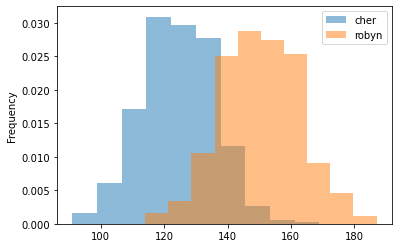

In [ ]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['cher'] * num_replicates + ['robyn']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting.

Q: What does the regular expression '\s+' match on?

A: It will match on one or more whitespace characters.

In [ ]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [ ]:
lyrics_clean = defaultdict(list)
artist_folders = os.listdir("Lyrics")
artists = ['robyn','cher']

#Tokenize whitespace using function provided

for artist, value in lyrics.items():
    tokenize_lyrics


artist
cher     AxesSubplot(0.125,0.125;0.775x0.755)
robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

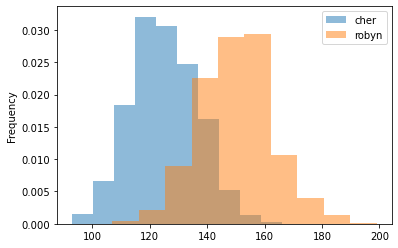

In [ ]:
df = pd.DataFrame({
    "artist" : ['cher'] * num_replicates + ['robyn']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

# More tokens are present because whitespaces are collapsed.